## Vanilla Linear Network with MFCC

In [12]:
import torch
import pytorch_lightning as pl
import sklearn.metrics
import matplotlib.pyplot as plt
from src.model.sample_model import VanillaNN, VanillaNNWithClean
from src.dataloader import SingleFXDataset
from src.transforms import MFCCSumTransform

In [3]:
model_1onN_no_clean = VanillaNN.load_from_checkpoint("lightning_logs/singleFX_1onN_no_clean/checkpoints/epoch=99-step=32599.ckpt", input_dim=40, num_classes=13)
model_1onN_no_clean.eval()
model_1onN_with_clean = VanillaNNWithClean.load_from_checkpoint("lightning_logs/singleFX_1onN_with_clean/checkpoints/epoch=99-step=32599.ckpt", input_dim=40, num_classes=13)
model_1onN_with_clean.eval()

VanillaNNWithClean(
  (model): Sequential(
    (0): Linear(in_features=80, out_features=128, bias=True)
    (1): ReLU()
    (2): Linear(in_features=128, out_features=13, bias=True)
  )
)

In [4]:
transform = MFCCSumTransform(sample_rate=44100, n_mfcc=40)

# valid_set_1on1 = SingleFXDataset("dataset/generated/gen_singleFX_1on1_09182021", 'valid', transform)
valid_set_1onN = SingleFXDataset("dataset/generated/gen_singleFX_1onN_09182021", 'valid', transform)
# loader_1on1 = pl.DataLoader(valid_set_1on1, batch_size=64)
loader_1onN = torch.utils.data.DataLoader(valid_set_1onN, batch_size=8192)



/opt/conda/lib/python3.8/site-packages/torchaudio/functional/functional.py:357: UserWarning: At least one mel filterbank has all zero values. The value for `n_mels` (128) may be set too high. Or, the value for `n_freqs` (201) may be set too low.
  warnings.warn(


In [5]:
y = valid_set_1onN.labels
trainer = pl.Trainer(gpus=1)
y_hat_with_clean = trainer.predict(model=model_1onN_with_clean, dataloaders=loader_1onN)
trainer = pl.Trainer(gpus=1)
y_hat_no_clean = trainer.predict(model=model_1onN_no_clean, dataloaders=loader_1onN)

GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
2021-09-27 15:55:01.014383: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0
/opt/conda/lib/python3.8/site-packages/pytorch_lightning/trainer/data_loading.py:105: UserWarning: The dataloader, predict dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 16 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 0it [00:00, ?it/s]

In [6]:
print(y.shape)
print(y_hat_no_clean[0].shape)

torch.Size([5213])
torch.Size([5213])


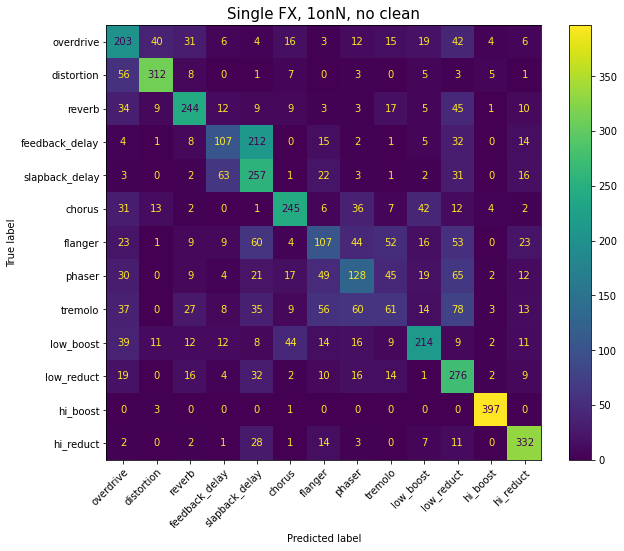

In [58]:
classes = list(valid_set_1onN.settings['fx_params'].keys())
fig, ax = plt.subplots()
cm = sklearn.metrics.confusion_matrix(y.cpu(), y_hat_no_clean[0].cpu())
disp = sklearn.metrics.ConfusionMatrixDisplay(cm, display_labels=classes)
disp.plot(ax=ax)
ax.set_xticklabels(classes, rotation=45, ha='right', rotation_mode='anchor')
ax.set_title('Single FX, 1onN, no clean', fontsize=15)
fig.set_size_inches(10, 8)
plt.show()

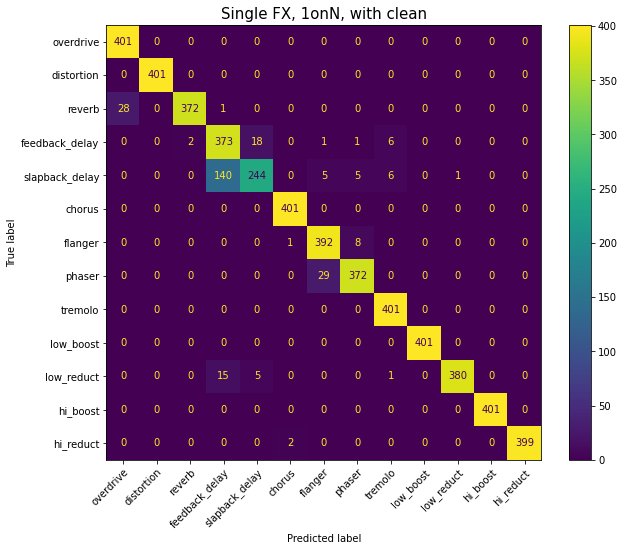

In [57]:
cm = sklearn.metrics.confusion_matrix(y.cpu(), y_hat_with_clean[0].cpu())
disp = sklearn.metrics.ConfusionMatrixDisplay(cm, display_labels=classes)
fig, ax = plt.subplots()
disp.plot(ax=ax)
ax.set_xticklabels(classes, rotation=45, ha='right', rotation_mode='anchor')
ax.set_title('Single FX, 1onN, with clean', fontsize=15)
fig.set_size_inches(10, 8)
plt.show()